In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


%matplotlib inline

In [2]:
data = pd.read_csv('Housingdata.csv')
print(data)

      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  \
0                             4.09     230

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB
None


In [4]:
data.dropna(inplace=True)

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB
None


In [6]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [7]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms',
          'Area Population']]
y = data['Price']

In [10]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state =101)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lm = LinearRegression() 

In [13]:
lm.fit(x_train,y_train)

LinearRegression()

In [14]:
#print the intercept
print(lm.intercept_)

-2640441.3997827456


In [15]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.566696
Avg. Area House Age,165453.042478
Avg. Area Number of Rooms,120499.839093
Avg. Area Number of Bedrooms,1999.785336
Area Population,15.340604


In [16]:
predictions = lm.predict(x_test)

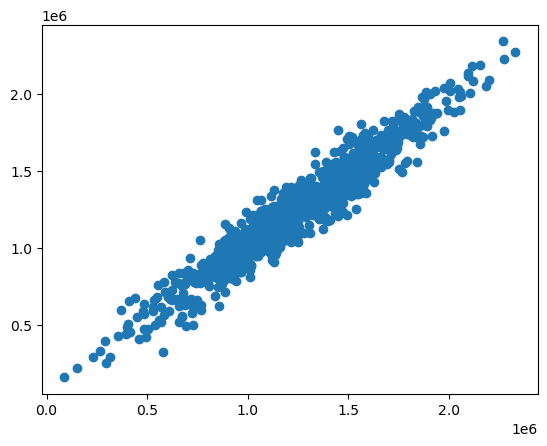

In [17]:
plt.scatter(y_test,predictions)

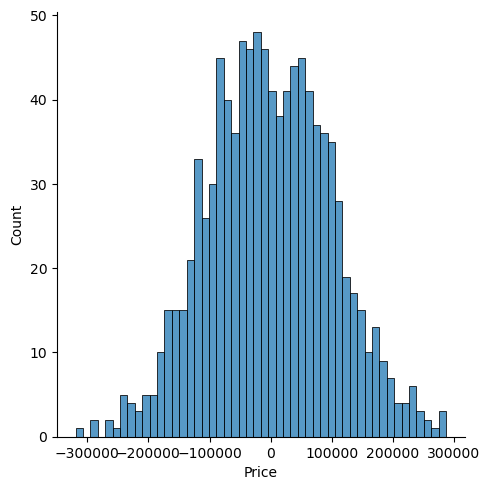

In [18]:
sns.displot((y_test-predictions),bins=50);

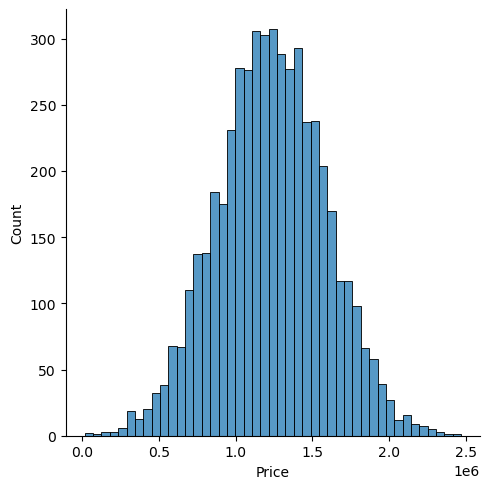

In [19]:
sns.displot(data['Price'])

In [20]:
from sklearn import metrics

In [21]:
print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test,predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 81305.23300086716
MSE: 10100187858.869934
RMSE: 100499.6908396734


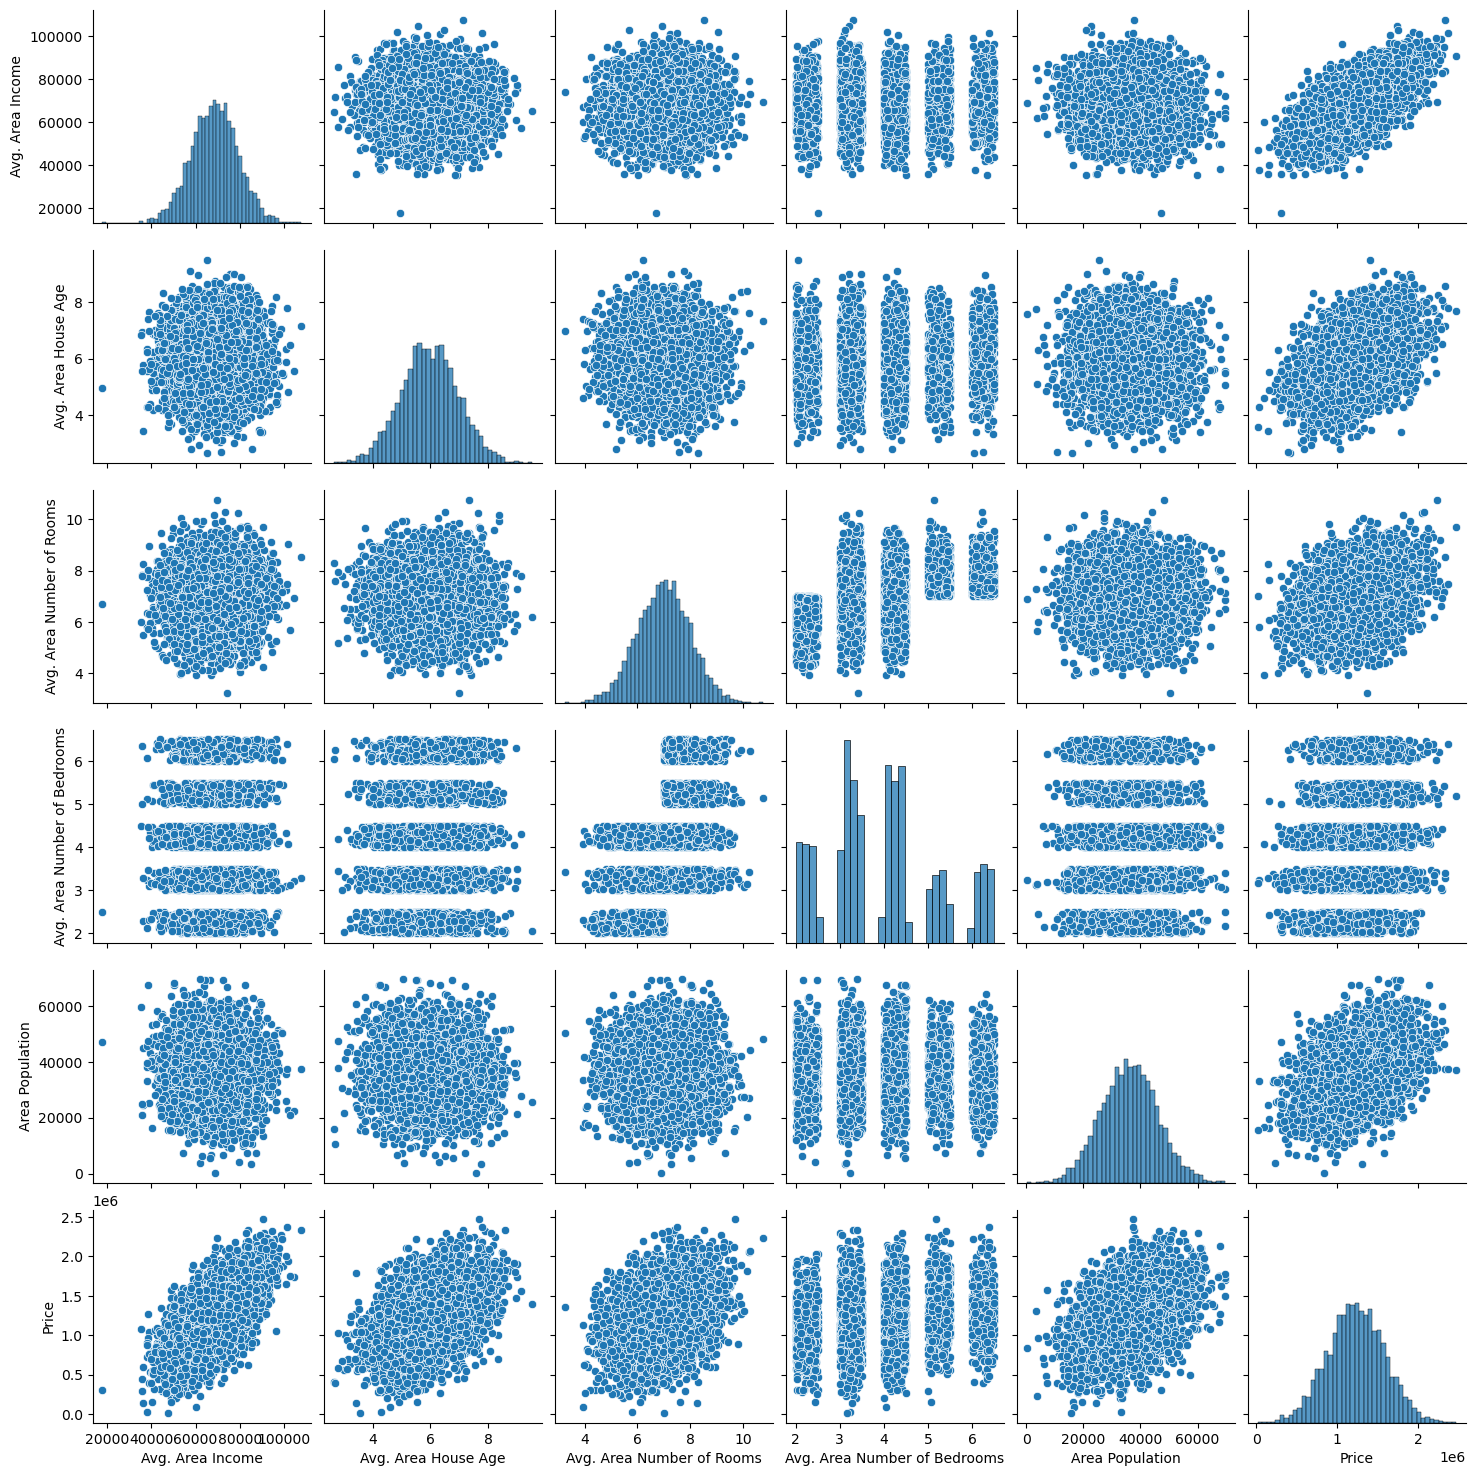

In [22]:
sns.pairplot(data)

In [23]:
x_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
3413,69048.788093,6.619712,6.123813,4.33,36817.368760
1610,67866.899929,5.393978,9.359022,5.44,43122.574176
3459,56636.238191,5.497667,7.121872,6.10,47541.431763
4293,79310.361977,4.247434,7.518204,4.38,43982.188957
1039,72821.247664,6.480819,7.116655,5.33,40594.059297
...,...,...,...,...,...
4171,56610.642563,4.846832,7.558137,3.29,25494.740298
599,70596.850945,6.548274,6.539986,3.10,51614.830136
1361,55621.899104,3.735942,6.868291,2.30,63184.613147
1547,63044.460096,5.935261,5.913454,4.10,32725.279544


In [24]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state =42)

In [25]:
train_data = x_train.join(y_train)

In [26]:
train_data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
4227,66547.016454,5.846095,6.847298,4.13,27850.822901,1.094880e+06
4676,53722.008599,6.401391,7.787764,3.30,47649.224665,1.300389e+06
800,64838.492899,6.437157,8.699544,4.02,32921.010068,1.382172e+06
3671,67097.092120,6.086754,7.211963,3.05,27191.506877,1.027428e+06
4193,75245.465436,8.167820,7.420100,3.42,37410.669928,1.562887e+06
...,...,...,...,...,...,...
4426,76223.561256,6.371627,5.342217,2.42,30165.337445,1.023944e+06
466,56685.014442,6.958045,7.502115,3.38,43322.166854,1.223101e+06
3092,66195.337714,6.507971,6.611861,3.14,37288.923574,1.318598e+06
3772,58694.515017,7.394768,9.269453,4.32,49960.977236,1.708631e+06


array([[<Axes: title={'center': 'Avg. Area Income'}>,
        <Axes: title={'center': 'Avg. Area House Age'}>],
       [<Axes: title={'center': 'Avg. Area Number of Rooms'}>,
        <Axes: title={'center': 'Avg. Area Number of Bedrooms'}>],
       [<Axes: title={'center': 'Area Population'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

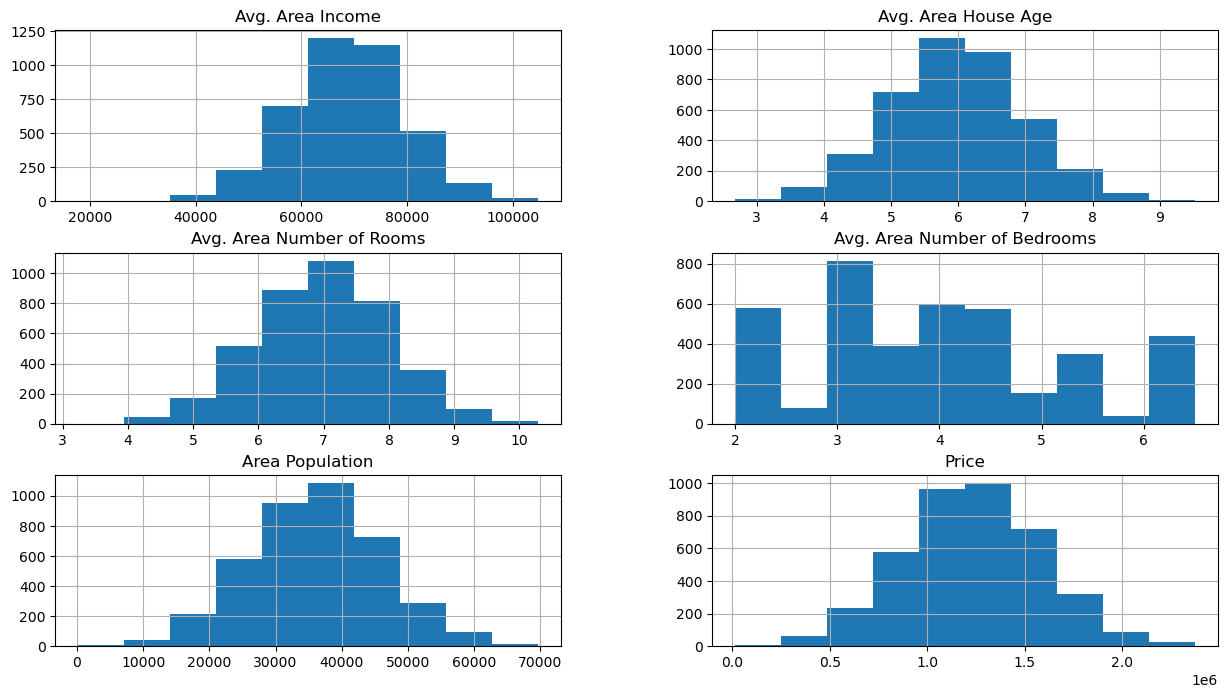

In [27]:
train_data.hist(figsize=(15,8))

In [28]:
train_data.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.003368,-0.008167,0.023489,-0.021533,0.641931
Avg. Area House Age,-0.003368,1.000000,-0.013624,0.005668,-0.015412,0.449148
Avg. Area Number of Rooms,-0.008167,-0.013624,1.000000,0.465097,-0.006868,0.330724
Avg. Area Number of Bedrooms,0.023489,0.005668,0.465097,1.000000,-0.019977,0.176661
Area Population,-0.021533,-0.015412,-0.006868,-0.019977,1.000000,0.406757
Price,0.641931,0.449148,0.330724,0.176661,0.406757,1.000000


<Axes: >

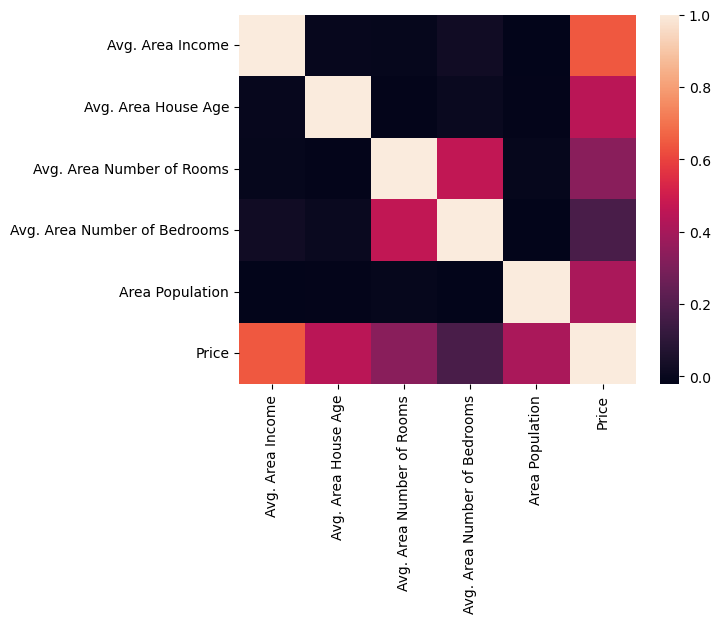

In [29]:
sns.heatmap(train_data.corr())

<Axes: >

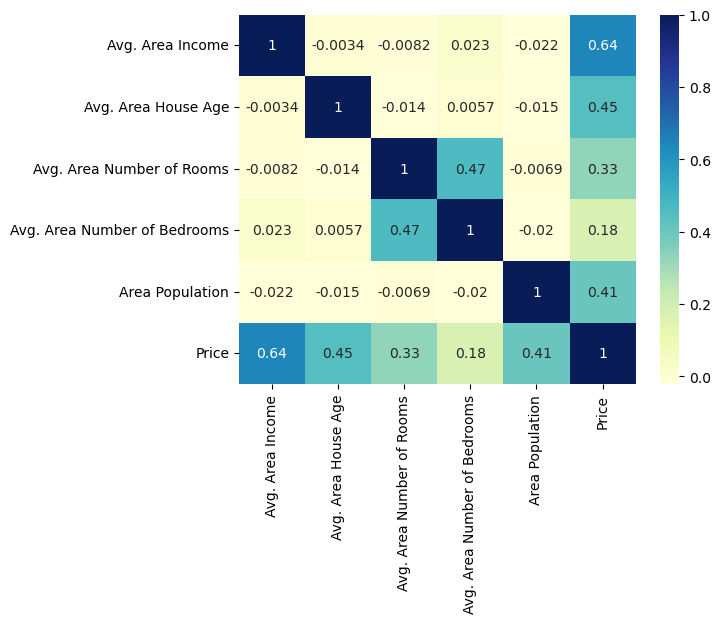

In [30]:
sns.heatmap(train_data.corr(), annot =True , cmap="YlGnBu")

<Axes: >

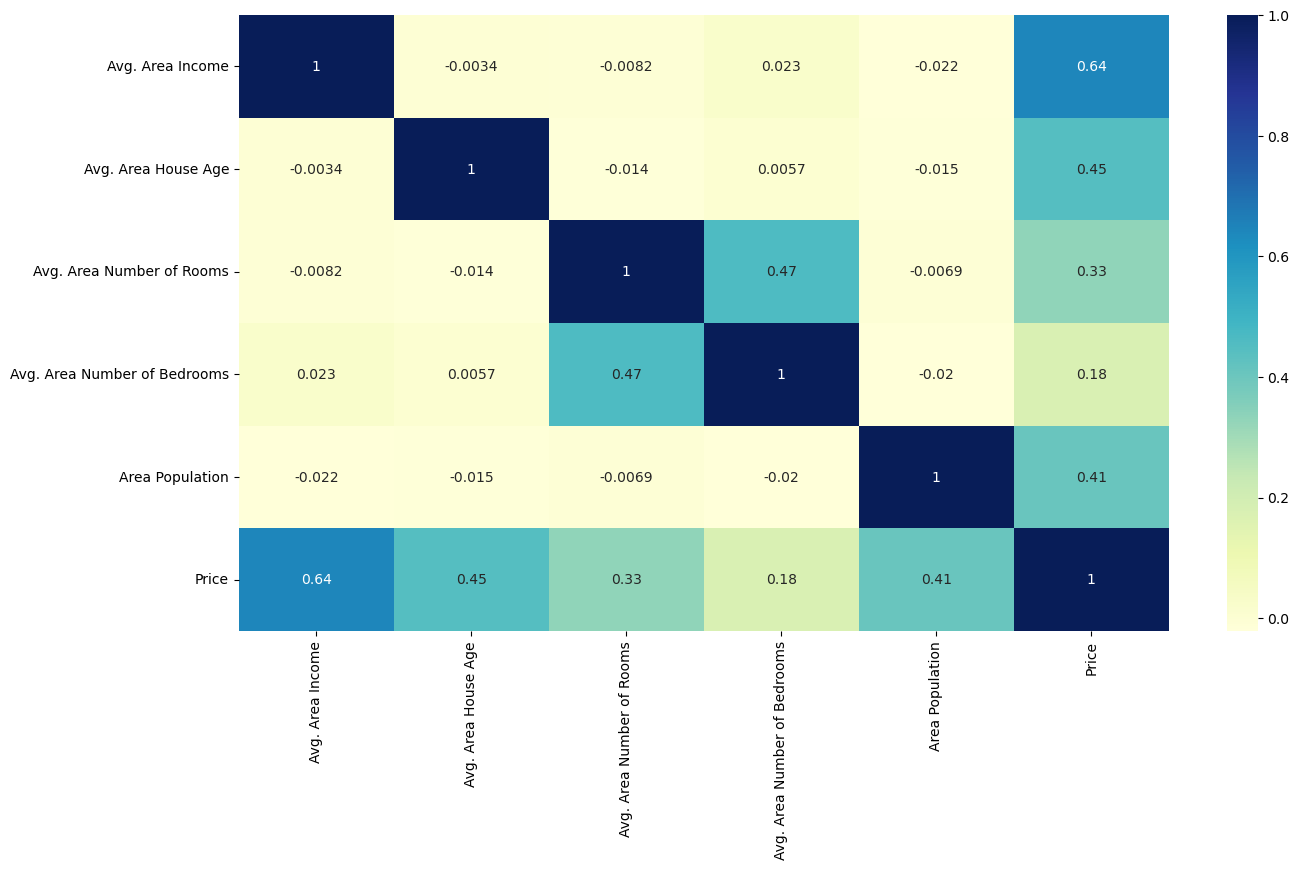

In [31]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot =True , cmap="YlGnBu")

<Axes: xlabel='Avg. Area Number of Rooms', ylabel='Price'>

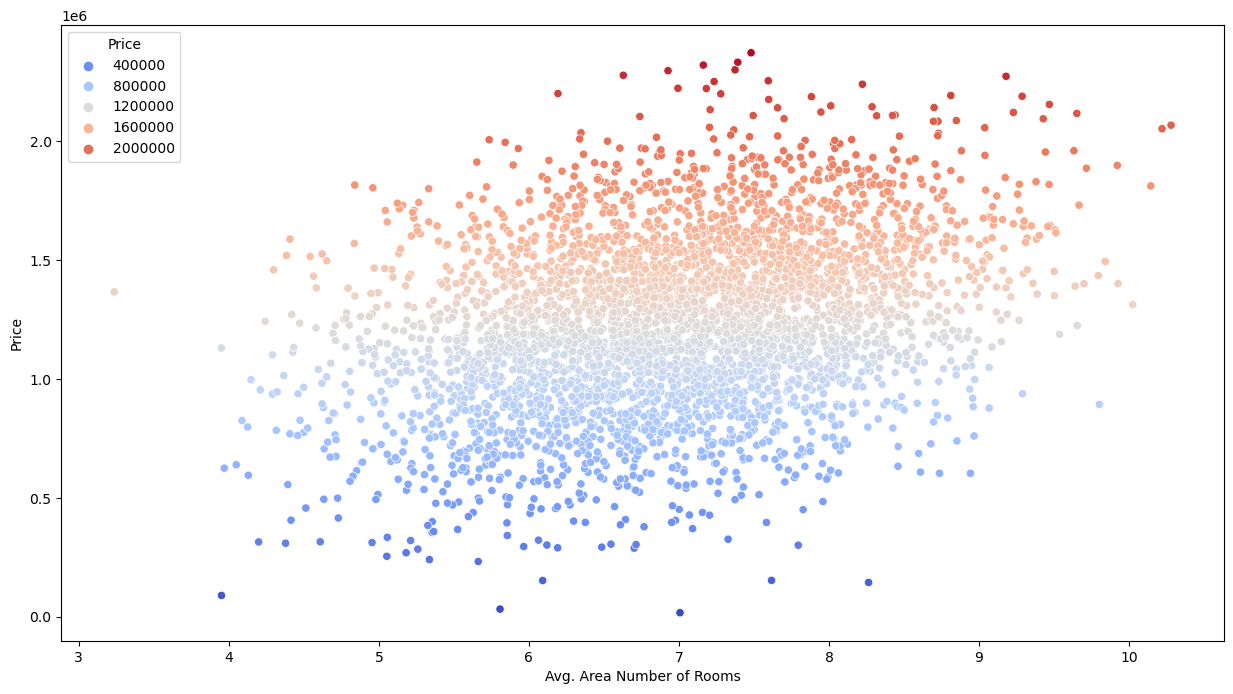

In [32]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="Avg. Area Number of Rooms",y="Price",data=train_data,hue="Price",palette="coolwarm")

In [33]:
train_data['Avg. Area Income'] = np.log(train_data['Avg. Area Income'] + 1)
train_data['Avg. Area House Age'] = np.log(train_data['Avg. Area House Age'] + 1)
train_data['Avg. Area Number of Rooms'] = np.log(train_data['Avg. Area Number of Rooms'] + 1)
train_data['Avg. Area Number of Bedrooms'] = np.log(train_data['Avg. Area Number of Bedrooms'] + 1)
train_data['Area Population'] = np.log(train_data['Area Population'] + 1)
train_data['Price'] = np.log(train_data['Price'] + 1)

array([[<Axes: title={'center': 'Avg. Area Income'}>,
        <Axes: title={'center': 'Avg. Area House Age'}>],
       [<Axes: title={'center': 'Avg. Area Number of Rooms'}>,
        <Axes: title={'center': 'Avg. Area Number of Bedrooms'}>],
       [<Axes: title={'center': 'Area Population'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

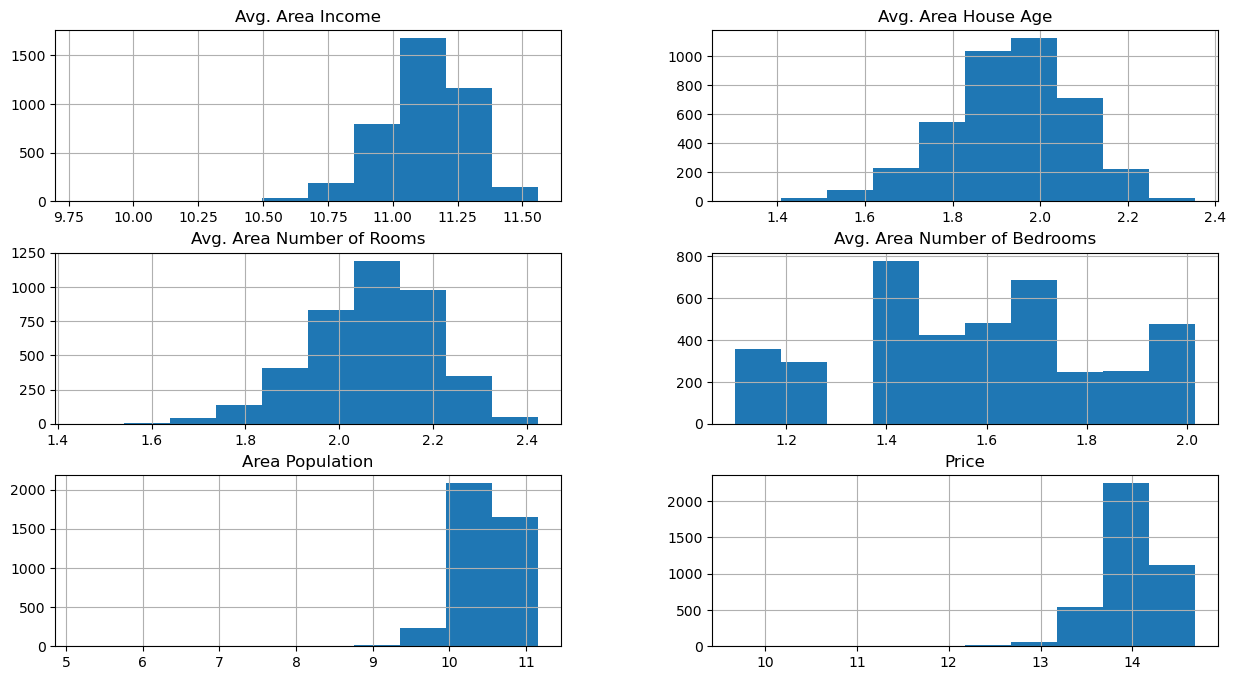

In [34]:
train_data.hist(figsize=(15,8))

C:\Users\anil sadgire\AppData\Local\Temp\ipykernel_20180\523874635.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot =True , cmap="YlGnBu")


<Axes: >

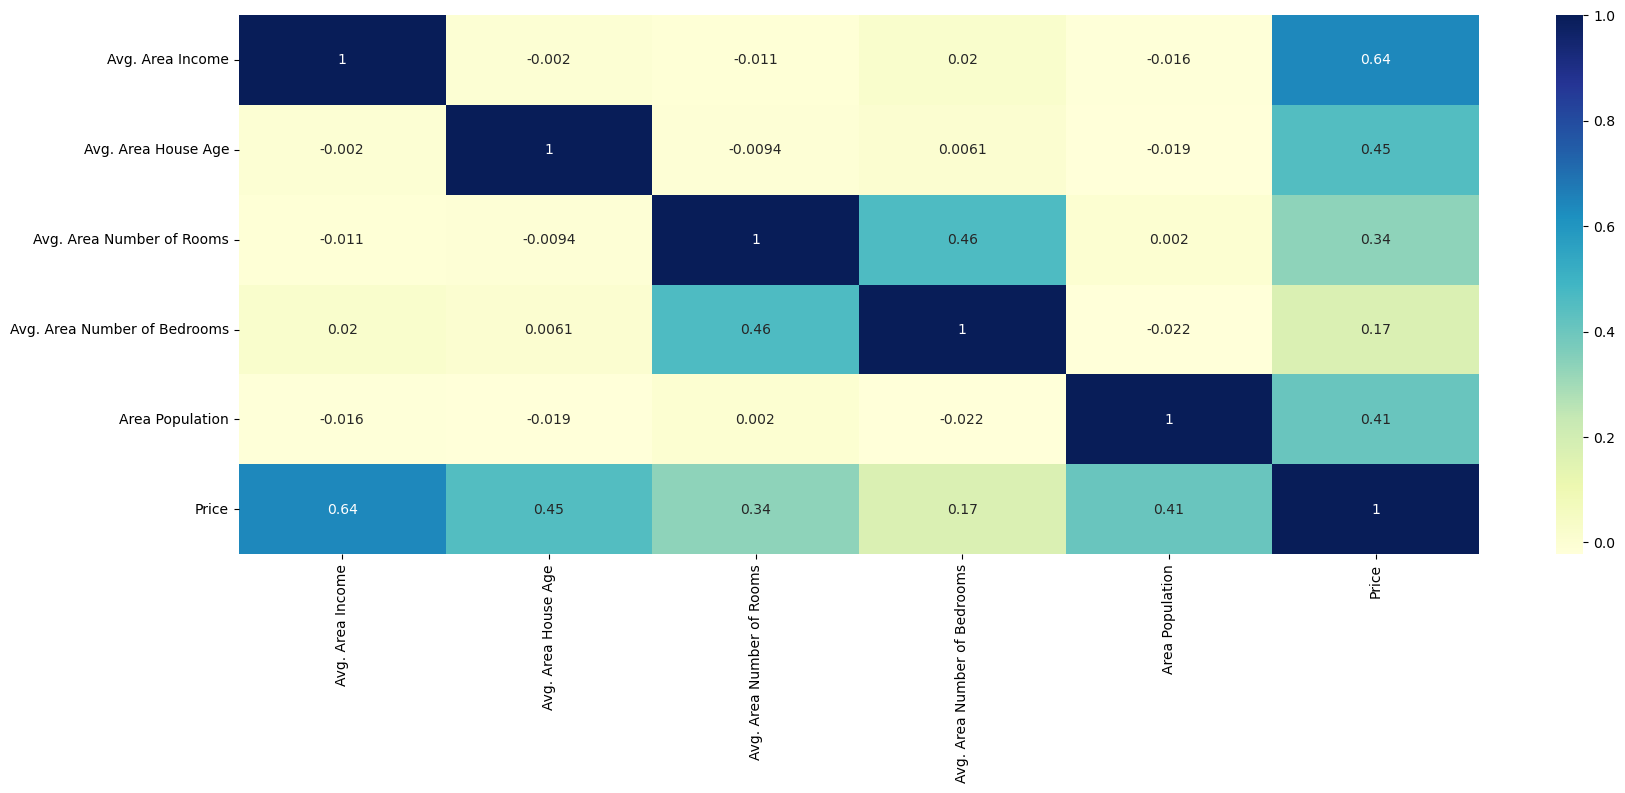

In [35]:
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot =True , cmap="YlGnBu")

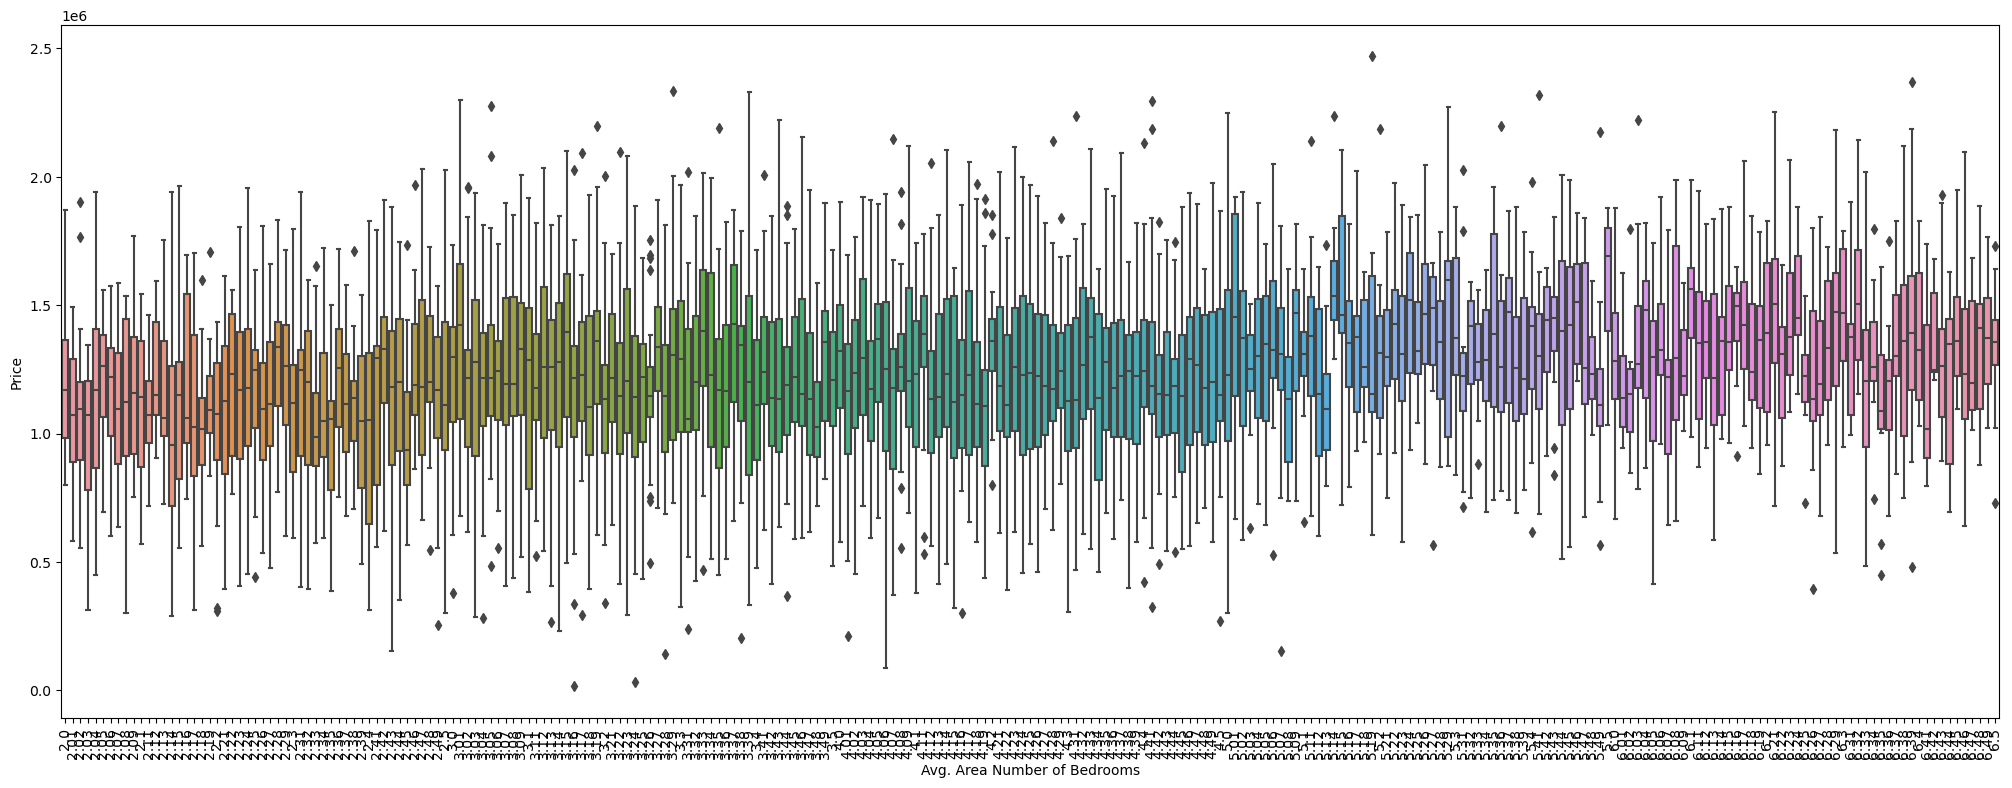

In [36]:
plt.figure(figsize=(25,9))
sns.boxplot(x ='Avg. Area Number of Bedrooms' , y='Price', data = data)
plt.xticks(rotation = 'vertical')
plt.show()